In [1]:
import os

if 'COLAB_GPU' in os.environ:
  print("GPU IS enabled")
else:
  print("GPU IS not enabled")

GPU IS enabled


**INSTALL YOLO-8 Model**

In [2]:
!pip install ultralytics==8.0.20

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.1 MB/s eta 0:00:00


**Check If YOLO-8 has been installed properly or not**

In [3]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


**Import Dataset from Roboflow**

In [4]:
%pwd

'/content'

In [5]:
!mkdir FaceDetectionSystem

In [6]:
!ls

FaceDetectionSystem


In [7]:
%pwd

'/content'

In [19]:
os.chdir("/content/FaceDetectionSystem")

In [20]:
%pwd

'/content/FaceDetectionSystem'

In [21]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JglmiERxBBYXFkqbPHzb")
project = rf.workspace("mohamed-traore-2ekkp").project("face-detection-mik1i")
version = project.version(18)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Face-Detection-18 in yolov8:: 100%|██████████| 6578/6578 [00:01<00:00, 5468.89it/s]


**Training The YOLOv8 Over A Custom Dataset**

In [22]:
os.chdir("/content/FaceDetectionSystem/Face-Detection-18")

In [23]:
%pwd

'/content/FaceDetectionSystem/Face-Detection-18'

In [28]:
!yolo task=detect \
      mode=train \
      model=yolov8n.pt \
      data="/content/FaceDetectionSystem/Face-Detection-18/data.yaml" \
      epochs=25 \
      imgsz=640 \
      batch=16 \
      augment=True

Streaming output truncated to the last 5000 lines.
      13/25      7.37G      1.308      1.083      1.301         35        640:  14% 25/180 [00:13<00:59,  2.59it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:299: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self.amp):
      13/25      7.37G      1.305       1.08      1.296         67        640:  14% 26/180 [00:13<00:54,  2.85it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:299: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self.amp):
      13/25      7.37G      1.305      1.076      1.299         29        640:  15% 27/180 [00:13<00:55,  2.77it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:299: FutureWarning: `torch.cuda.amp.aut

**Display Some Of The Content We Obtained**

In [29]:
!ls '/content/FaceDetectionSystem/Face-Detection-18/runs/detect/train4/weights'

best.pt  last.pt


In [30]:
!ls '/content/FaceDetectionSystem/Face-Detection-18/runs/detect/train4'

args.yaml					    F1_curve.png  R_curve.png  weights
confusion_matrix.png				    P_curve.png   results.csv
events.out.tfevents.1736761194.4969bccbdd80.4895.0  PR_curve.png  results.png


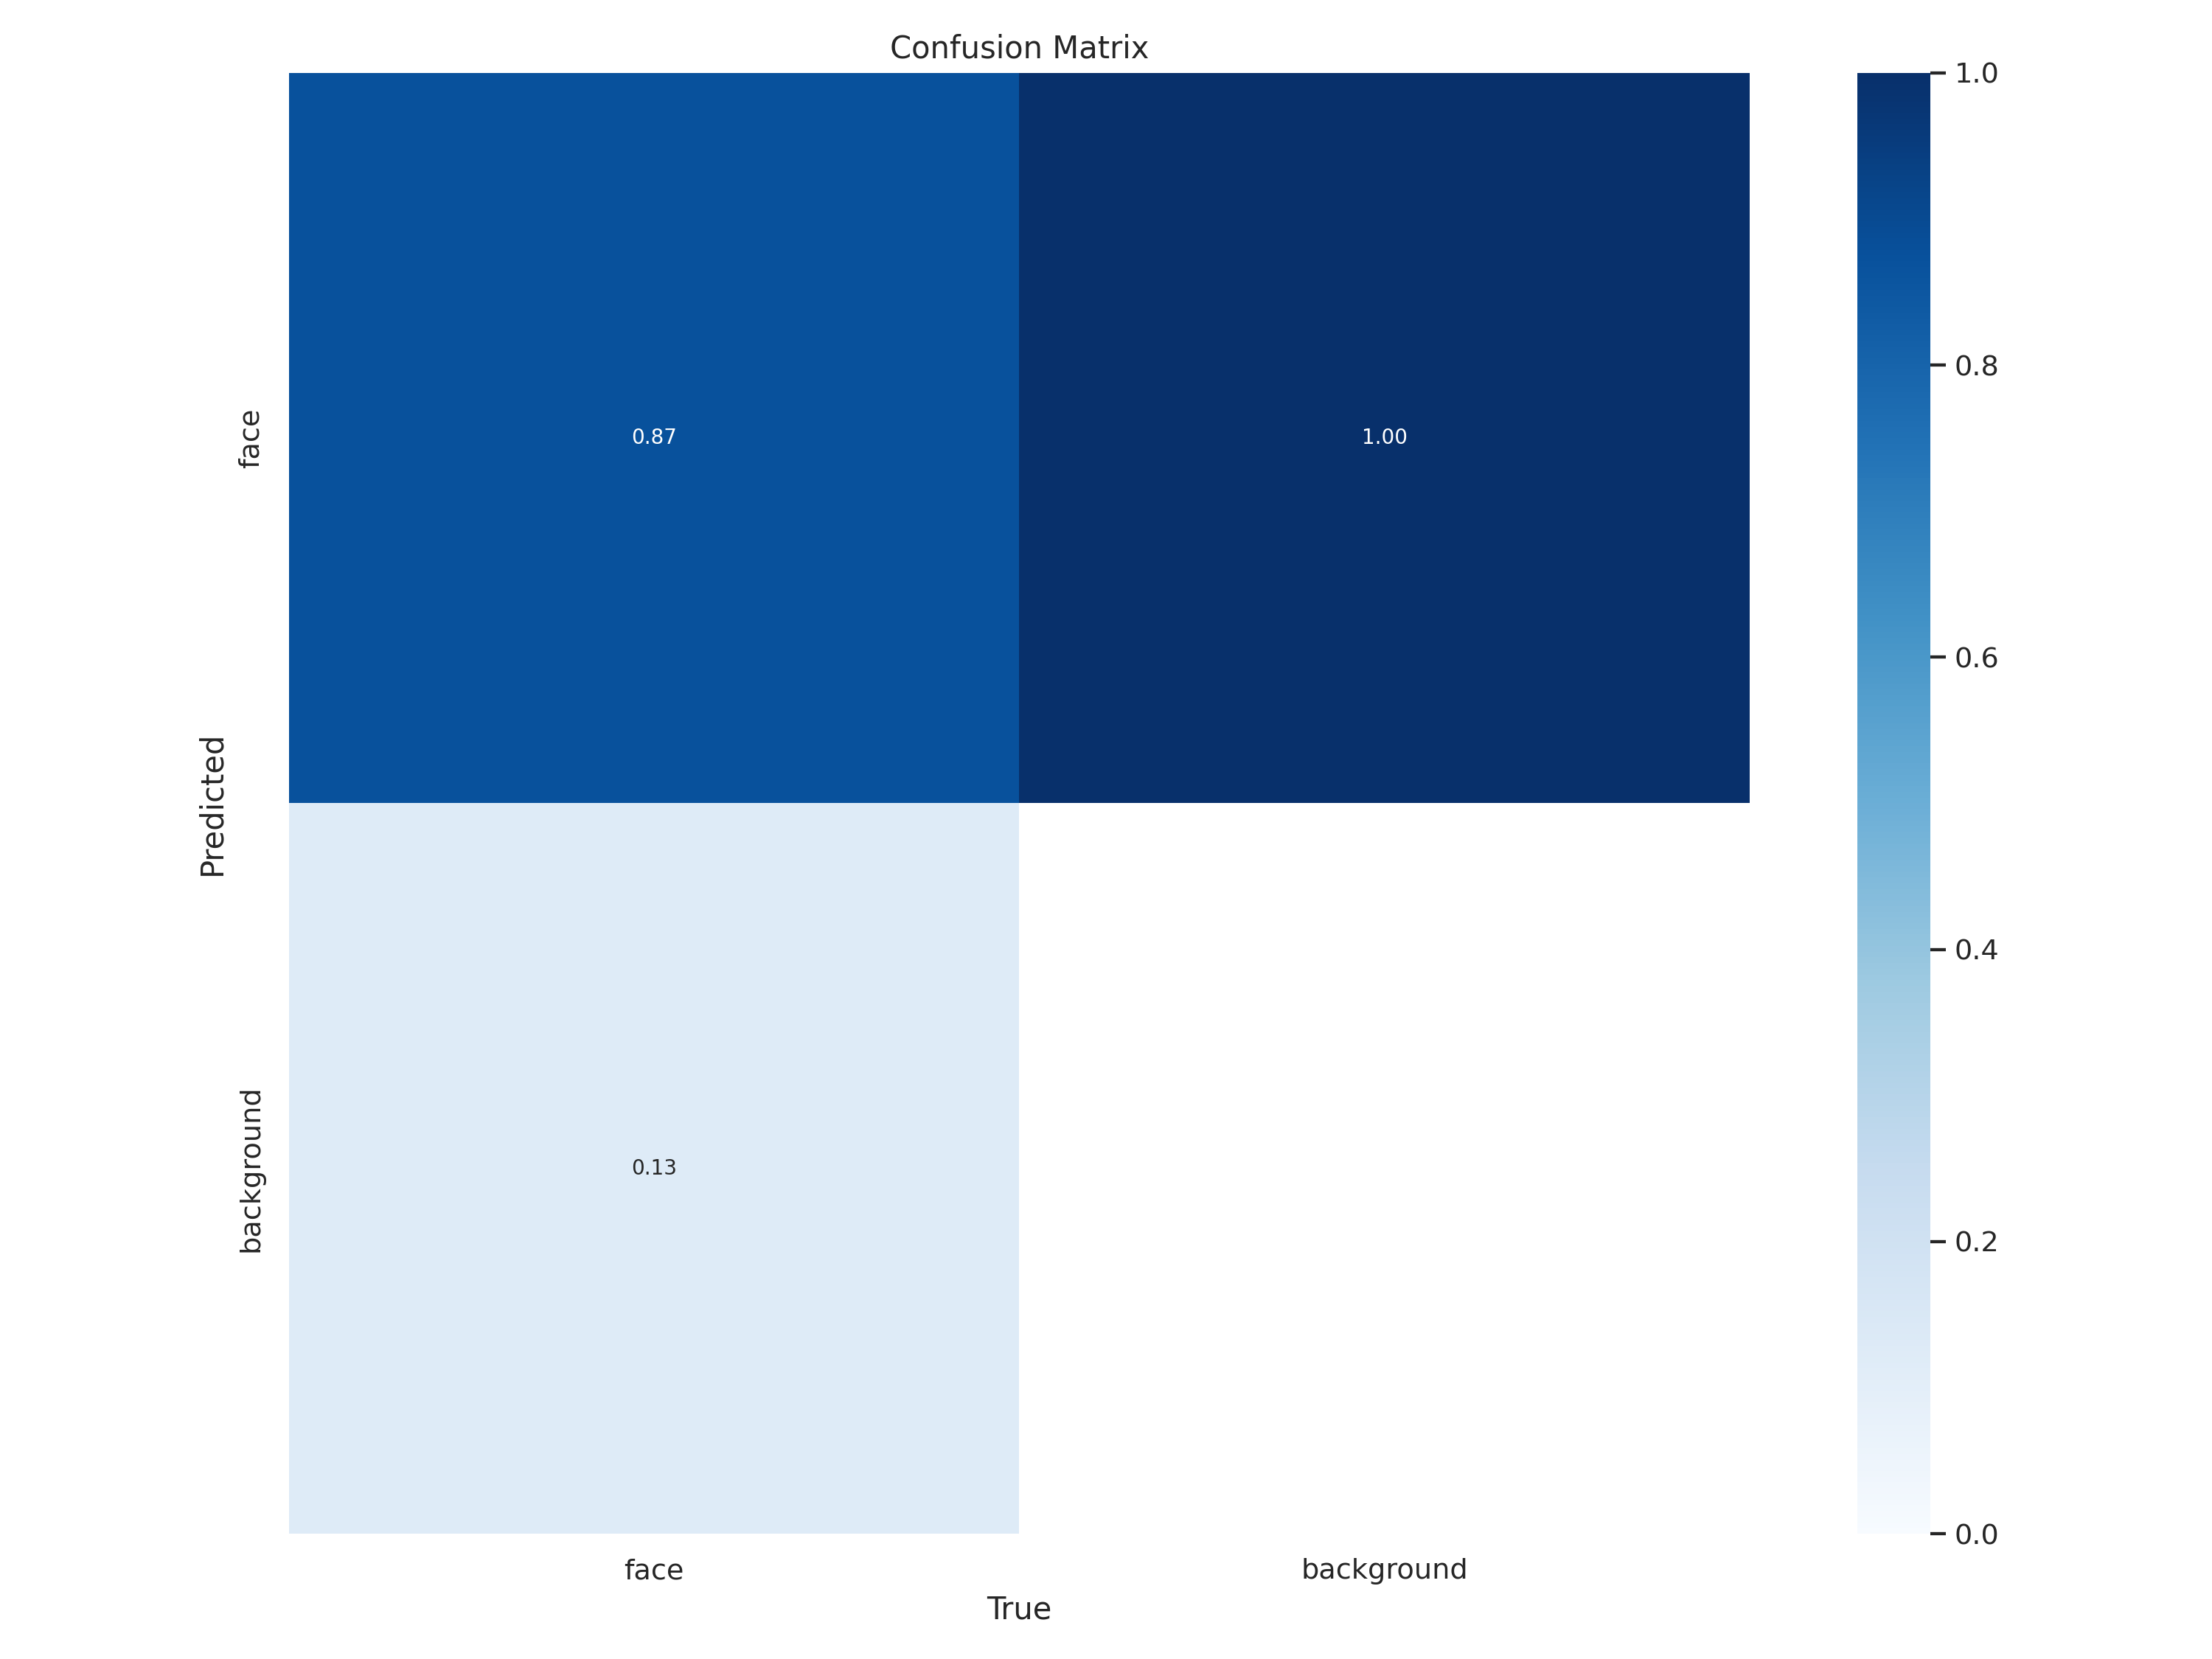

In [39]:
resultData="/content/FaceDetectionSystem/Face-Detection-18/runs/detect/train4/"

from IPython.display import Image, display

Image(filename = f'{resultData}confusion_matrix.png')

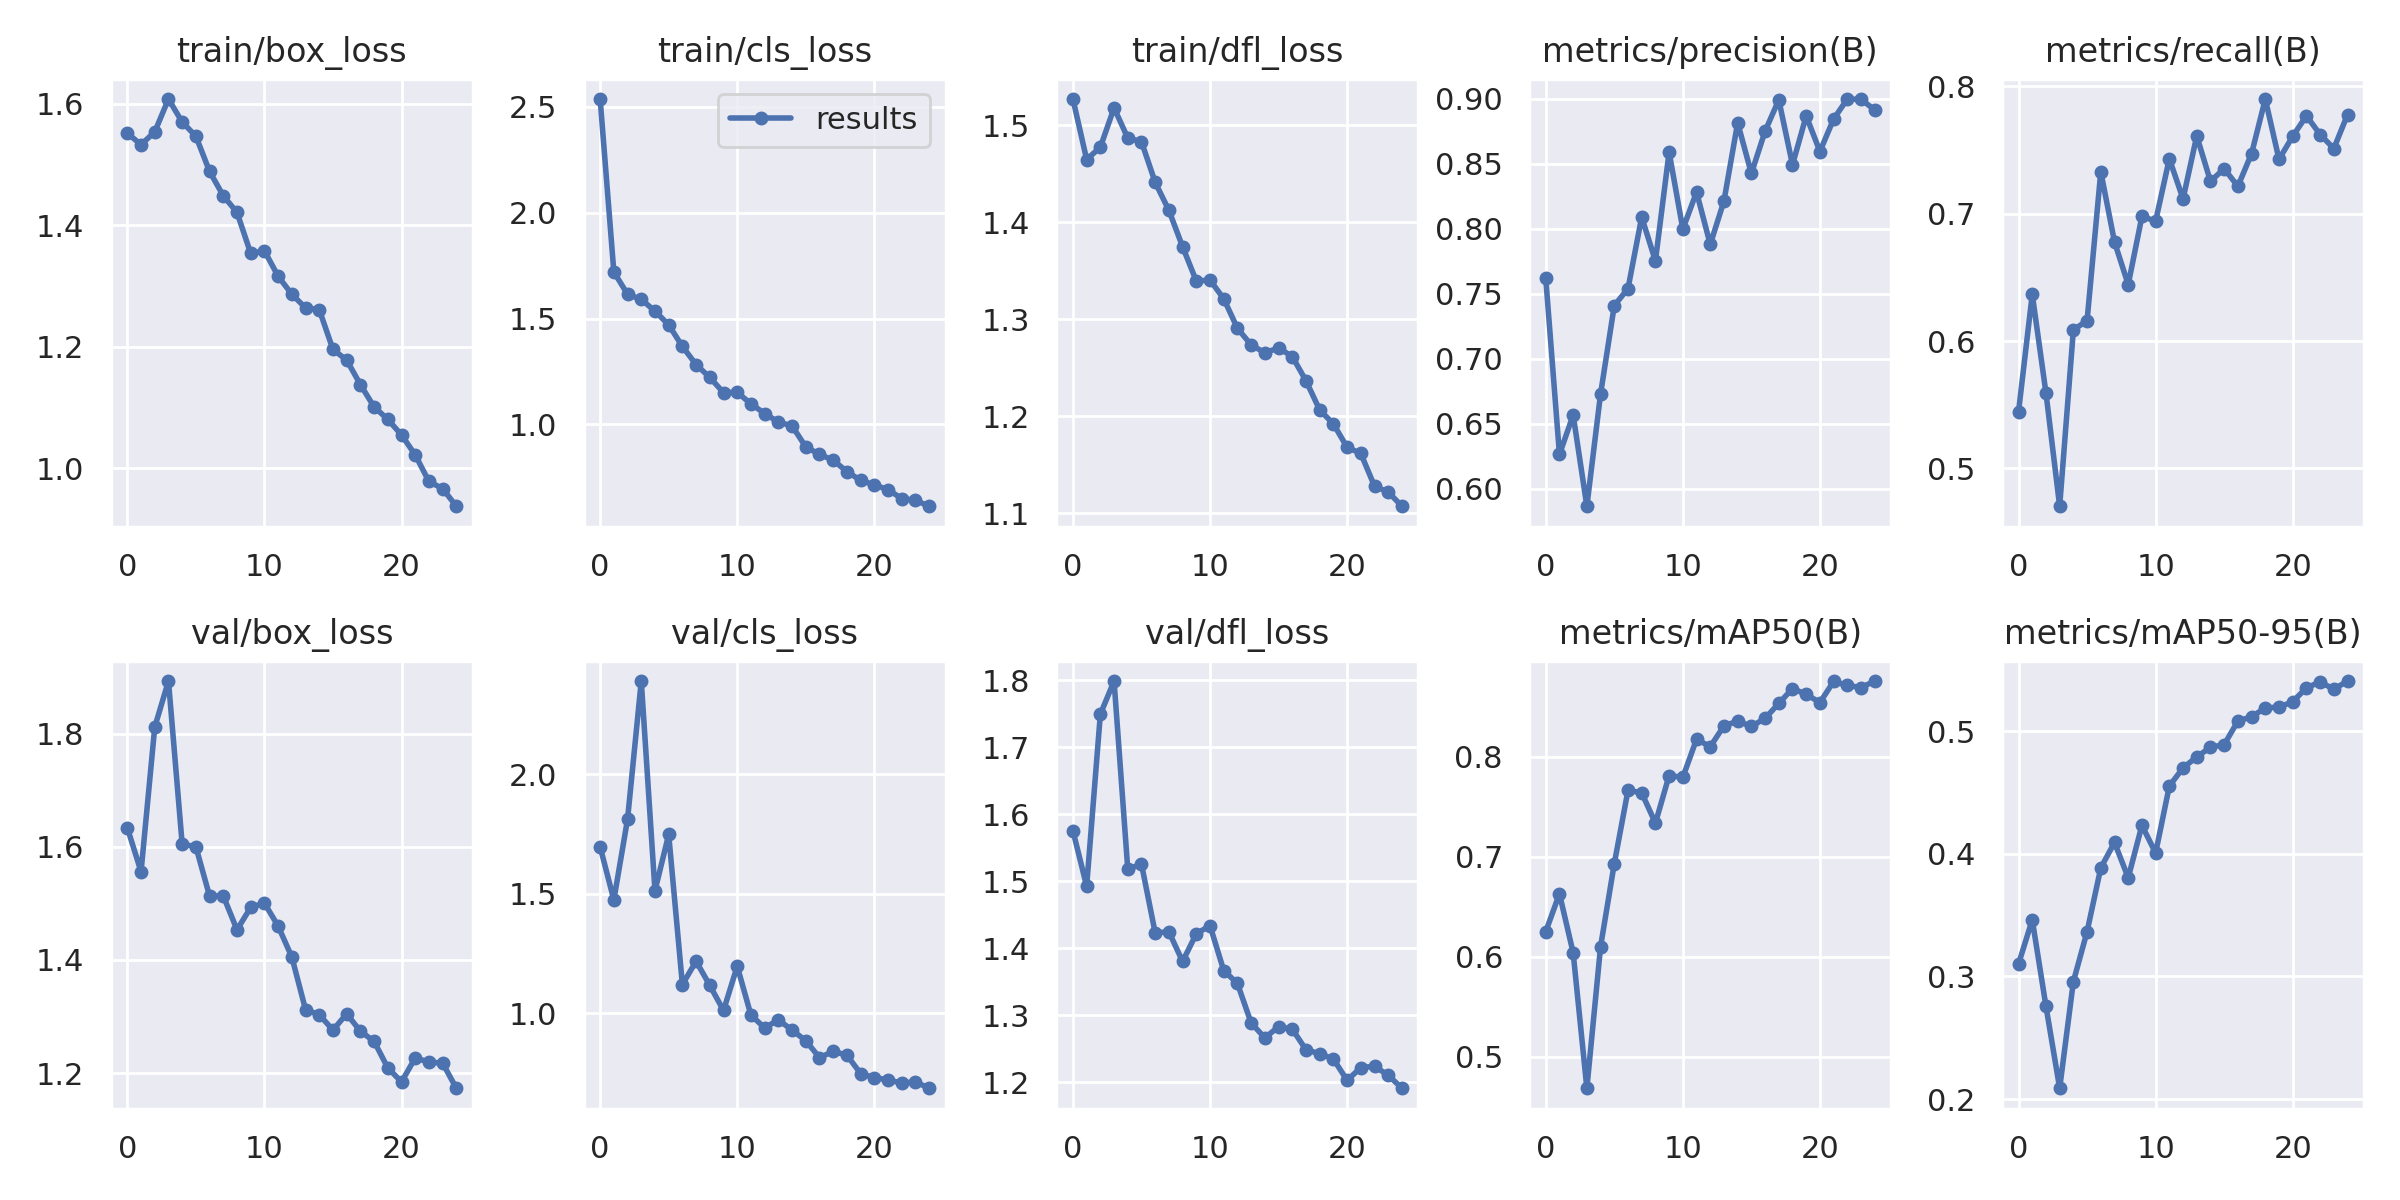

In [40]:
Image(filename = f'{resultData}results.png')

In [41]:
import pandas as pd

df=pd.read_csv(f'{resultData}results.csv')

print(df.head(3))

                  epoch        train/box_loss        train/cls_loss  \
0                     0                1.5517                2.5375   
1                     1                1.5327                1.7205   
2                     2                1.5538                1.6149   

         train/dfl_loss  metrics/precision(B)  ...          val/cls_loss  \
0                1.5268               0.76211  ...                1.6963   
1                1.4645               0.62657  ...                1.4741   
2                1.4772               0.65679  ...                1.8122   

           val/dfl_loss                lr/pg0                lr/pg1  \
0                1.5756              0.070167              0.003315   
1                1.4927              0.039903              0.006385   
2                1.7495              0.009376              0.009191   

                 lr/pg2  
0              0.003315  
1              0.006385  
2              0.009191  

[3 rows x 14 columns

In [42]:
import pandas as pd

df=pd.read_csv(f'{resultData}results.csv')

print(df.tail(1))

                   epoch        train/box_loss        train/cls_loss  \
24                    24               0.93718               0.61311   

          train/dfl_loss  metrics/precision(B)  ...          val/cls_loss  \
24                1.1073               0.89128  ...               0.68533   

            val/dfl_loss                lr/pg0                lr/pg1  \
24                1.1912              0.000892              0.000892   

                  lr/pg2  
24              0.000892  

[1 rows x 14 columns]


**Test your model on any arbitary video containing road signs**

In [43]:
%pwd

'/content/FaceDetectionSystem/Face-Detection-18'

In [44]:
os.chdir("/content")

In [45]:
%pwd

'/content'

In [46]:
!mkdir ManualTestingData

In [47]:
os.chdir("/content/ManualTestingData")

In [48]:
%pwd

'/content/ManualTestingData'

In [52]:
weightsPath="/content/FaceDetectionSystem/Face-Detection-18/runs/detect/train4/weights"

!yolo task=detect mode=predict model={weightsPath}/best.pt  source="/content/ManualTestingData/videoplayback.mp4" save=True conf=0.5


/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2025-0

In [53]:
from google.colab import files

files.download('/content/ManualTestingData/runs/detect/predict/videoplayback.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>